# Example 2: WEC Integration
This notebook demonstrates WEC-Grid's core functionality for wave energy converter integration:
- Setting up a grid system with WEC devices
- Running time-domain simulations
- Analyzing WEC performance and grid impact

This example uses the IEEE 30 case system with RM3 wave energy converters.

In [ ]:
import wecgrid

example2 = wecgrid.Engine("../data/WECGrid.db")
example2.case("../data/grid_models/IEEE_30_bus.raw")
example2.load(["pypsa"])
example2

Engine:
├─ Case: IEEE 30 bus
├─ PyPSA: Loaded
├─ PSS/E: Not Loaded
├─ WEC-Farms/WECs: 0 - 0
└─ Buses: 30

Sbase: 100.0 MVA

## Create WEC-Farm with a WEC Devices

Lets create a WEC Farm with a ten RM3 devices. The RM3 simulation data was pulled from the pre-loaded WEC-Grid database found here. Specifics about the RM3 run can be found in the documentation.

In [5]:
#Information about the wec-sim runs in database can accessed using 
example2.database.wecsim_runs()

,wec_sim_id,model_type,sim_duration_sec,delta_time,wave_height_m,wave_period_sec,wave_spectrum,wave_class,wave_seed,simulation_hash,created_at
0,2,LUPA,86400.0,0.1,2.5,8.0,PM,irregular,8,LUPA_2.5m_8.0s_8,2025-08-19 19:59:49
1,1,RM3,86400.0,0.1,2.5,8.0,PM,irregular,94,RM3_2.5m_8.0s_94,2025-08-19 19:45:01


In [6]:
example2.apply_wec(
   farm_name = "WEC-Farm-RM3",
   size = 10, # ten RM3 in WEC farm  
   wec_sim_id = 1, # RM3 run id  
   bus_location=31, # create a new bus for farm  
   connecting_bus = 1, # Connect to bus 1 or swing bus
)

WEC Farm added: WEC-Farm-RM3


## Review updated Grid

GridState:
├─ Components:
│   ├─ bus:   31 components
│   ├─ gen:   7 components
│   ├─ line:  38 components
│   └─ load:  21 components
├─ Case: IEEE 30 bus
└─ Modeler: pypsa
    bus bus_name   type         p         q     v_mag  angle_deg  vbase
0     1    Bus_1  Slack  2.622848  0.292738  1.060000   0.000000  132.0
1     2    Bus_2     PV  0.183000  0.520602  1.043130  -5.386804  132.0
2     3    Bus_3     PQ -0.024000 -0.012000  1.016632  -7.481005  132.0
3     4    Bus_4     PQ -0.076000 -0.016000  1.007639  -9.242707  132.0
4     5    Bus_5     PV -0.942000  0.244116  1.010000 -14.264829  132.0
5     6    Bus_6     PQ  0.000000  0.000000  1.005305 -11.100180  132.0
6     7    Bus_7     PQ -0.228000 -0.109000  0.998515 -12.911507  132.0
7     8    Bus_8     PV -0.300000  0.253481  1.010000 -11.985576  132.0
8     9    Bus_9     PQ  0.000000  0.000000  1.030117 -20.182300    1.0
9    10   Bus_10     PQ -0.058000 -0.020000  1.006702 -22.246135   33.0
10   11   Bus_11     PV  0.00000

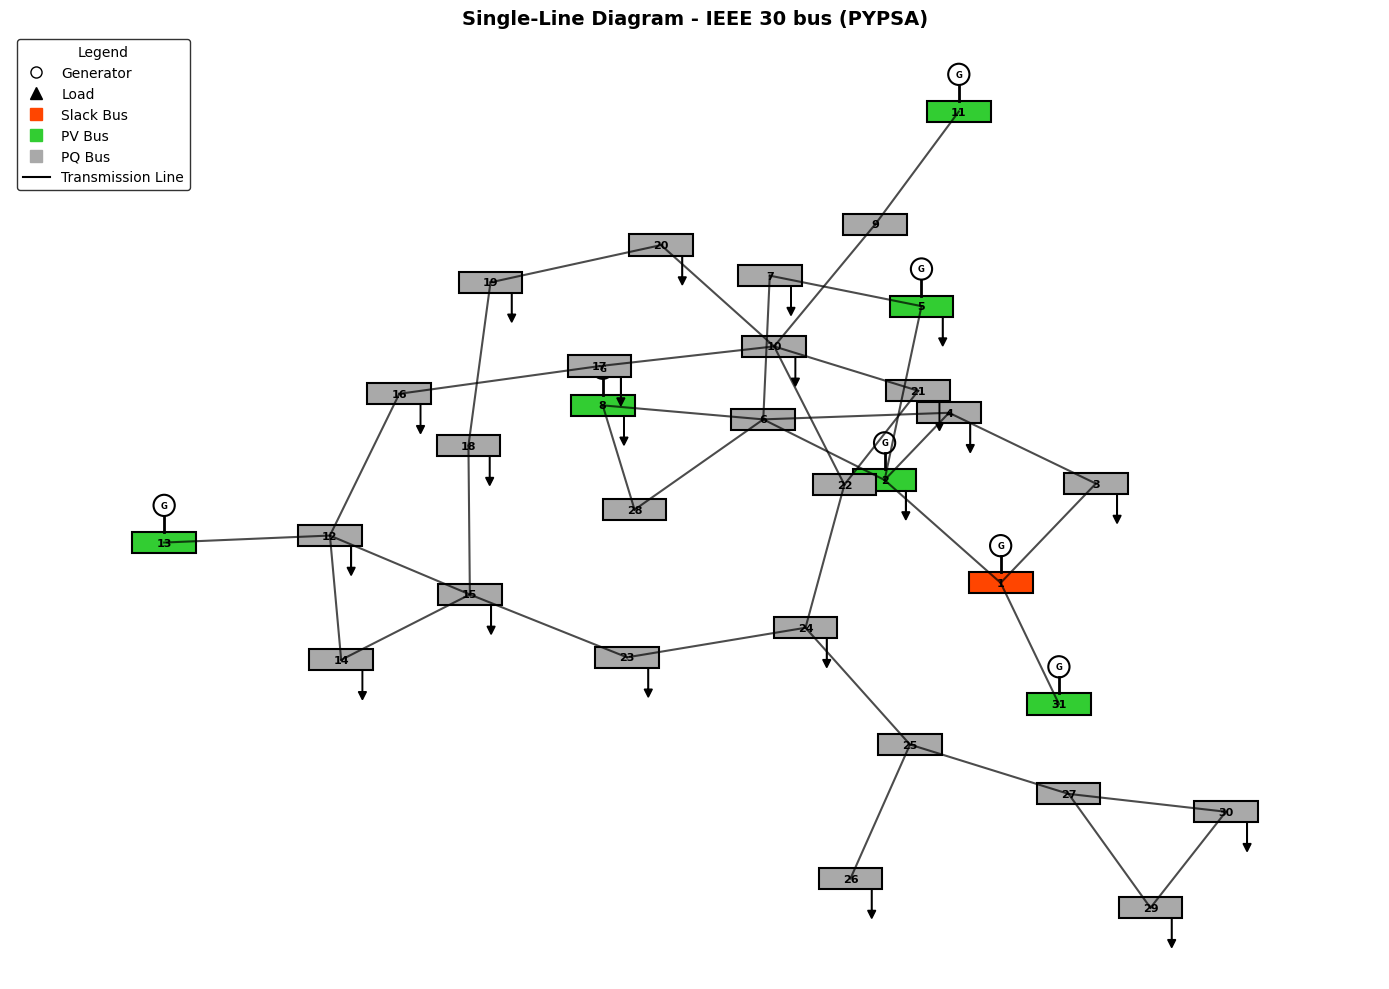

In [10]:
grid = example2.pypsa.grid
print('='*60)
print(grid)
print('='*60)
print(grid.bus)
print('='*60)
print(grid.gen)
print('='*60)
example2.plot.sld()

## Run Time Series Simulation

Execute a time-domain simulation to analyze WEC power injection and grid response over 24 hours. 

In [6]:
example2.simulate() # takes some time!

PyPSA Simulating: 100%|██████████| 288/288 [03:01<00:00,  1.58step/s]


## Analyze and Visualize Results

Create comprehensive plots to analyze WEC performance and grid impact over time.

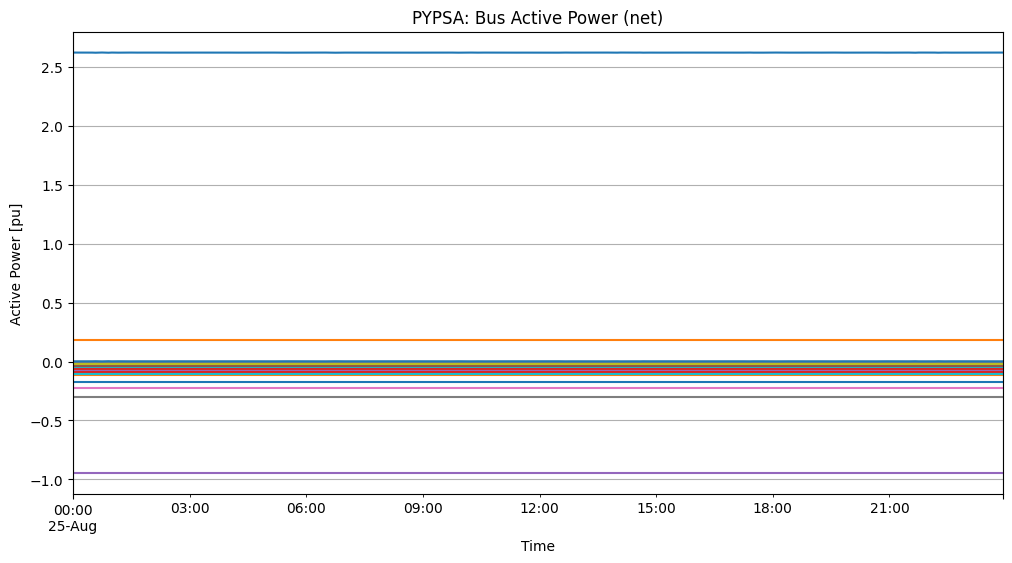

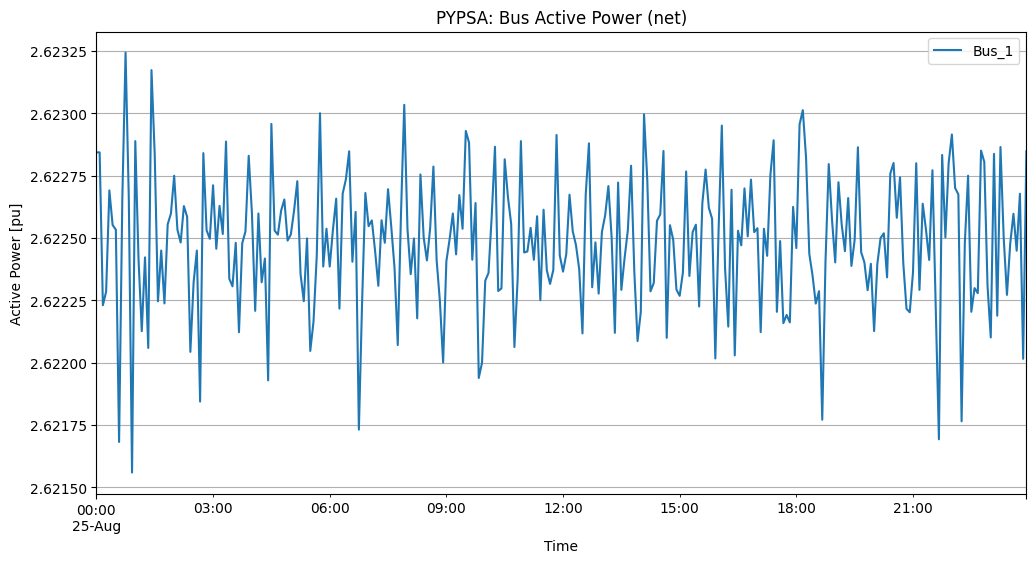

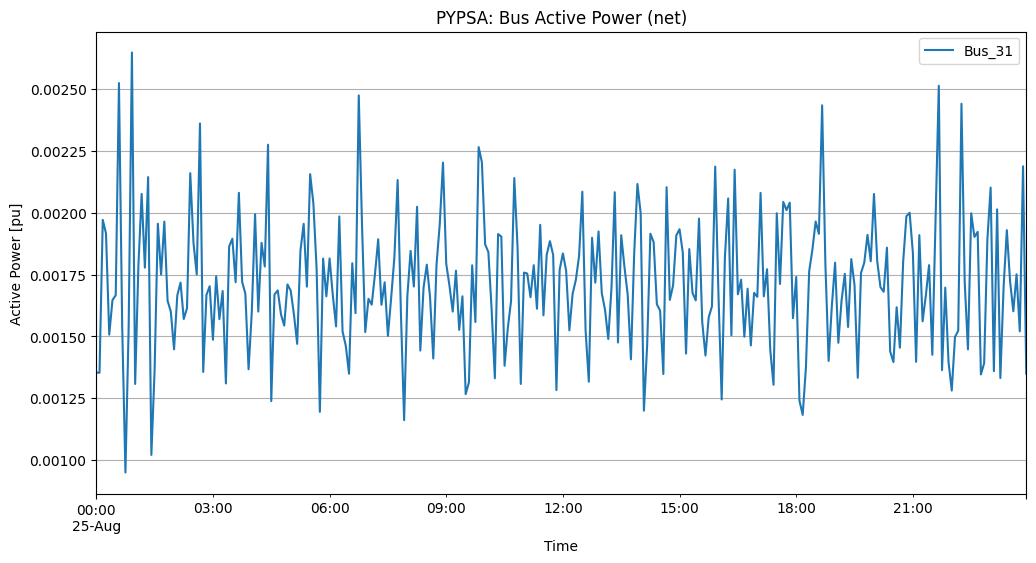

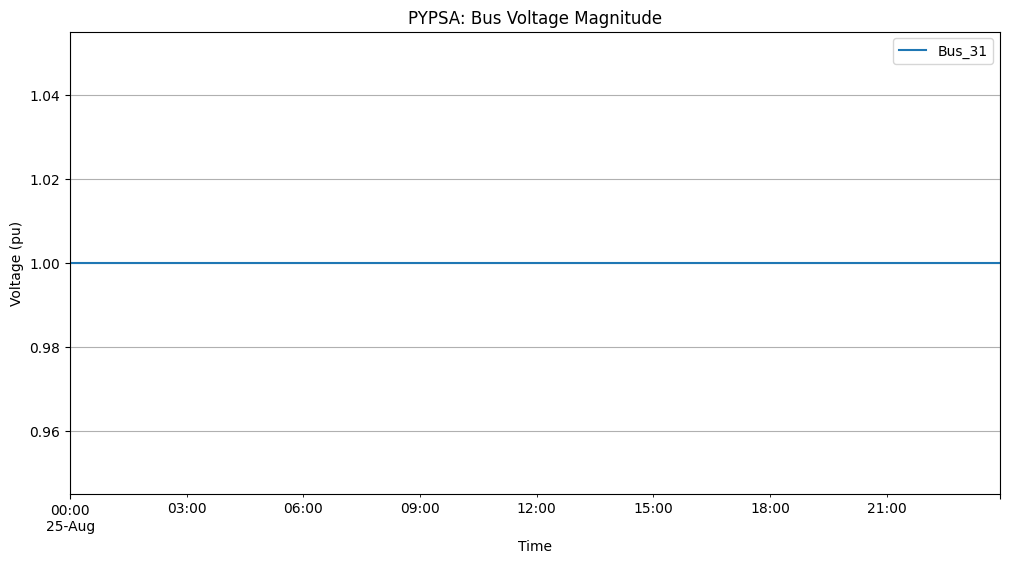

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'PYPSA: Bus Voltage Magnitude'}, xlabel='Time', ylabel='Voltage (pu)'>)

In [7]:
plot = example2.plot
plot.bus()
plot.bus(bus=['Bus_1']) # Swing Bus
plot.bus(bus=['Bus_31']) # WEC-Farm Bus
plot.bus(parameter='v_mag',bus=['Bus_31'])

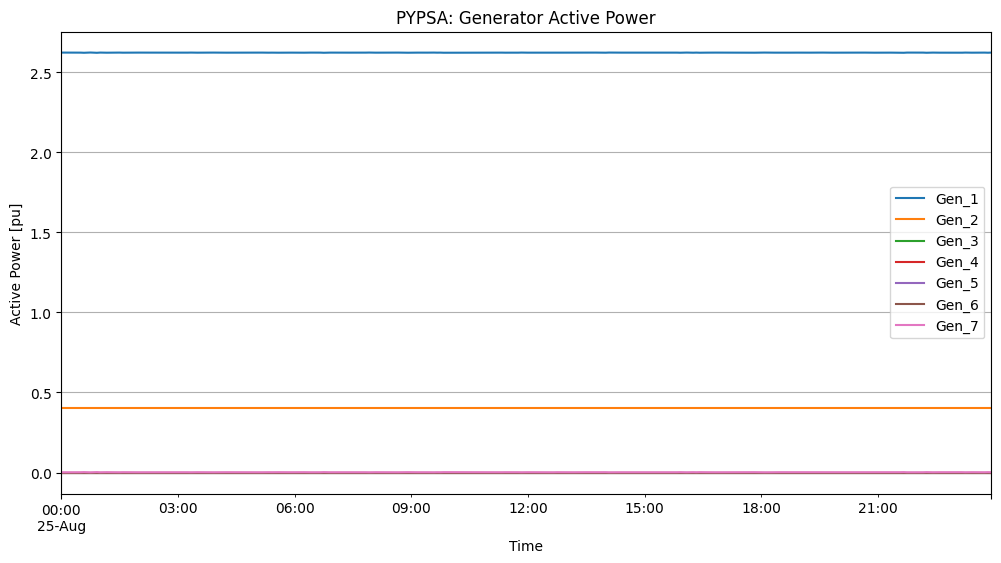

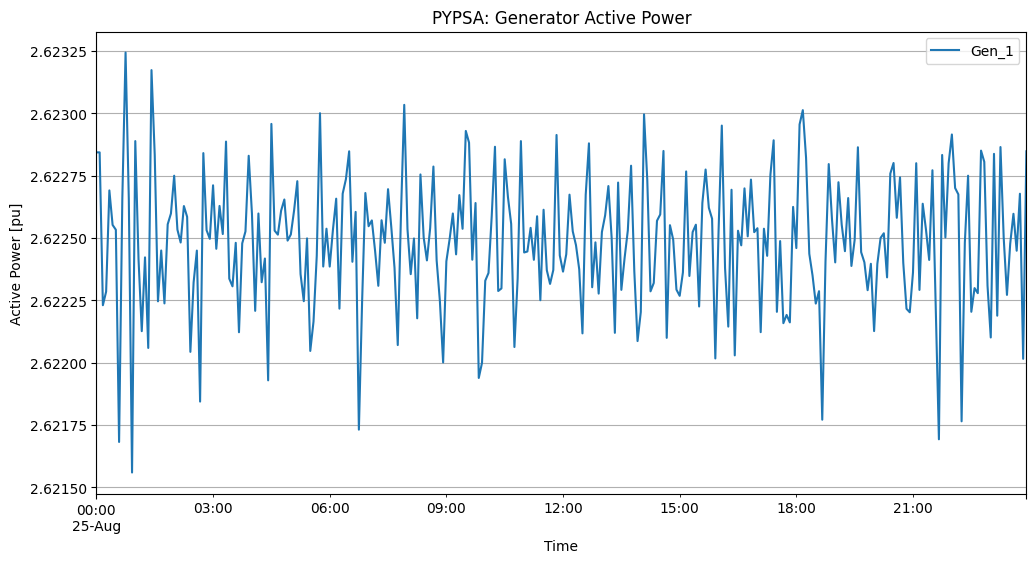

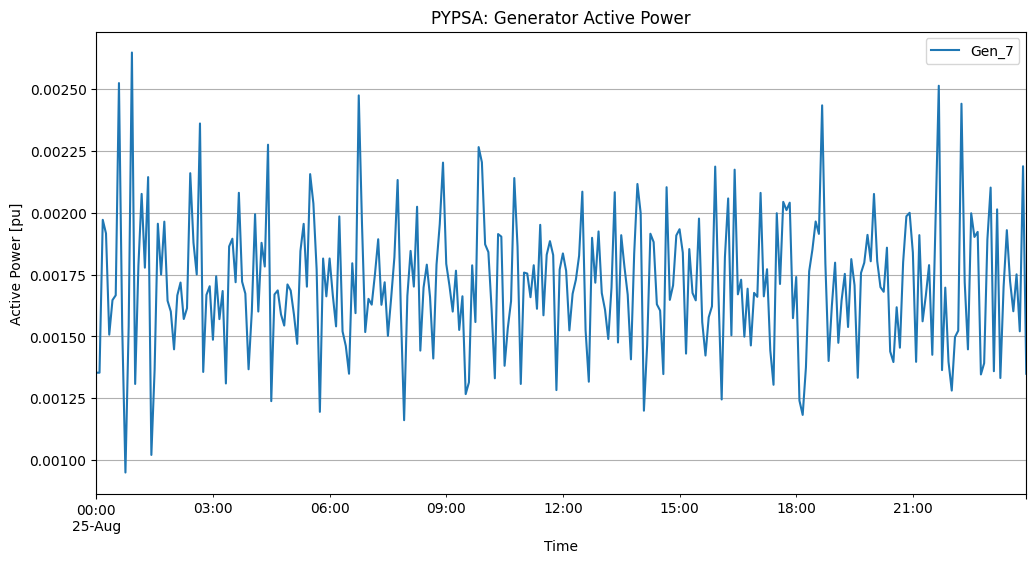

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'PYPSA: Generator Active Power'}, xlabel='Time', ylabel='Active Power [pu]'>)

In [8]:
plot.gen()
plot.gen(gen=['Gen_1']) # Swing Generator 
plot.gen(gen=['Gen_7']) # WEC-Farm Generator


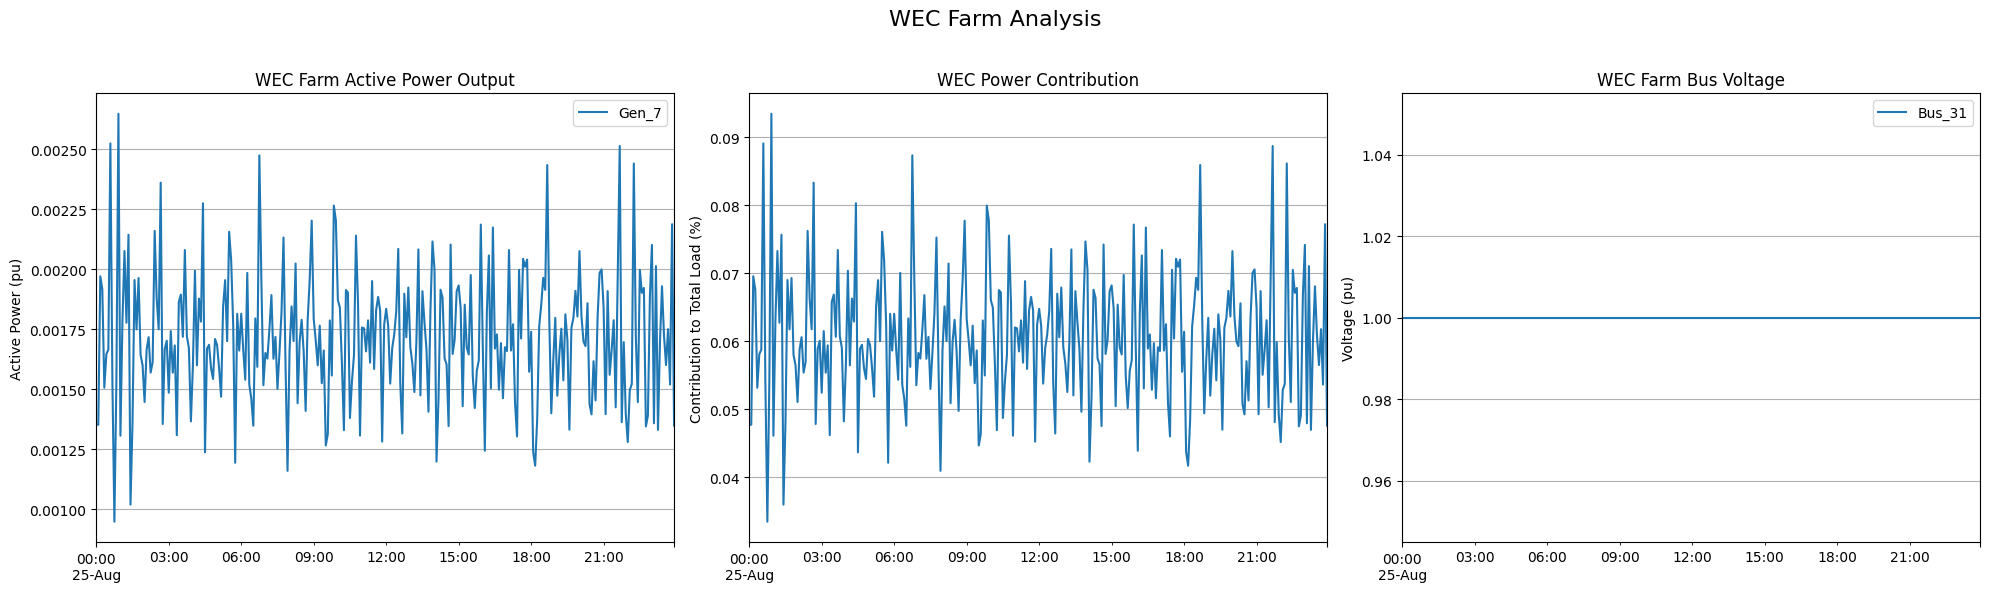

In [9]:
plot.wec_analysis()